In [1]:
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
import matplotlib.ticker as ticker
thesis_dir = '/home/azstephe/liverRegression/regression_liver/data/figs/'

colors = {
        'Rat': '#94c4be',      
        'Macaque': '#89a1b6',
        'Cow': '#d1c177',      
        'Pig': '#d59698',
        'Mouse': '#a78dc7',
        'Neg': '#a3a3a3'
}

super_super_lights = {
    'Rat': '#d9ecea',
    'Macaque': '#d5dde7',
    'Cow': '#f2ecd0',
    'Pig': '#f5d6d7',
    'Mouse': '#e2d8f0',
    'Neg': '#e0e0e0'
}

super_lights = {
    'Rat': '#cce4e0',
    'Macaque': '#c6d2de',
    'Cow': '#e8e0bb',
    'Pig': '#ebc5c7',
    'Mouse': '#d7cdea',
    'Neg': '#d1d1d1'

}

darks = {
        'Rat': '#7ea7a2',      
        'Macaque': '#74899b',
        'Cow': '#bfb164',      
        'Pig': '#b67076',
        'Mouse': '#8669a7',
        'Neg': '#8e8e8e'
}

lights = {
        'Rat': '#aadfda',      
        'Macaque': '#9eb9d1',
        'Cow': '#e3d289',      
        'Pig': '#f4b9bb',
        'Mouse': '#c6b3df',
        'Neg': '#b6b6b6'
}

super_darks = {
    'Rat': '#2e4946',       # dark teal
    'Macaque': '#2a3a46',   # dark slate blue
    'Cow': '#4d471f',       # dark olive
    'Pig': '#472d2f',       # dark rose
    'Mouse': '#5f4a77',      # dark gray
    'Neg': '#353535'      # dark gray
}

def histogram(pred_df, name, status):
    species = status.split(' ')[-1]
    plt.hist(pred_df, bins=50, color=colors[species])
    plt.xlim(0,4.1)
    plt.ylim(0, 1)
    plt.xlabel(f'{name}')
    plt.ylabel('Count')
    plt.title(f'Histogram of {status}')
    # plt.savefig(f"{thesis_dir}{direc}{status.replace(' ', '_')}.png", dpi=300, bbox_inches='tight')
    plt.show()

def correlations(pred_df, true_df, group):
    x = true_df.squeeze()
    y = pred_df.squeeze()
    
    pearson_corr, pearson_p_test = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient for {group}: {pearson_corr:.4f}, p-test: {pearson_p_test:.4g}")
    
    spearman_corr, spearman_p_test = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient for {group}: {spearman_corr:.4f}, p-test: {spearman_p_test:.4g}")
    return pearson_corr, pearson_p_test, spearman_corr, spearman_p_test

def scatter(pred_df, true_df, title, xlabel, ylabel, r, rho):
    x = true_df.squeeze()
    y = pred_df.squeeze() 
    
    plt.figure(figsize=(8, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='#015088', linestyle='--', label='y = x')
    plt.scatter(x, y, alpha=0.2)
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.title(f'{title}')

    textstr = f'$r$ = {r:.2f}\n$\\rho$ = {rho:.2f}'
    plt.text(0.07, 0.93, textstr, transform=plt.gca().transAxes,
         fontsize=16, verticalalignment='top')

    plt.grid(True)
    plt.show()
def pearson_spearman(x, y):
    pearson_corr, pearson_p_value = scipy.stats.pearsonr(x, y)
    print(f"Pearson correlation coefficient: {pearson_corr:.4f}, p-value: {pearson_p_value:.4g}")

    spearman_corr, spearman_p_value = scipy.stats.spearmanr(x, y)
    print(f"Spearman correlation coefficient: {spearman_corr:.4f}, p-value: {spearman_p_value:.4g}")
    return pearson_corr, pearson_p_value, spearman_corr, spearman_p_value

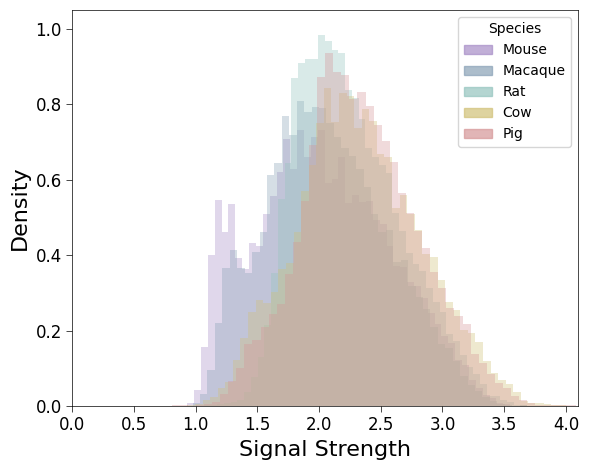

In [2]:
# histogram of logged overlay all 5 species
import pandas as pd
import matplotlib.pyplot as plt
direc = 'distrib_hist/'

files = {
    'Mouse': '/home/azstephe/liverRegression/regression_liver/data/log/mouse_liver_pos_ALL.bed',
    'Macaque': '/home/azstephe/liverRegression/regression_liver/data/log/macaque_liver_pos_ALL.bed',
    'Rat': '/home/azstephe/liverRegression/regression_liver/data/log/rat_liver_pos_ALL.bed',
    'Cow': '/home/azstephe/liverRegression/regression_liver/data/log/cow_liver_pos_ALL.bed',
    'Pig': '/home/azstephe/liverRegression/regression_liver/data/log/pig_liver_pos_ALL.bed'
}

# Plot all histograms on the same figure
plt.figure(figsize=(6, 4.8))

for species, path in files.items():
    df = pd.read_csv(path, header=None, sep='\t')
    plt.hist(df[4], bins=50, alpha=0.35, label=species, color=colors[species], density=True, edgecolor=None)

plt.xlabel('Signal Strength', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
        # 'Rat': '#94c4be',      
        # 'Macaque': '#89a1b6',
        # 'Cow': '#d1c177',      
        # 'Pig': '#d59698',
        # 'Mouse': '#a78dc7',
legend_handles = [
    Patch(facecolor='#a78dc7', edgecolor='#a78dc7', label='Mouse', alpha=0.7),
    Patch(facecolor='#89a1b6', edgecolor='#89a1b6', label='Macaque', alpha=0.7),
    Patch(facecolor='#94c4be', edgecolor='#94c4be', label='Rat', alpha=0.7),
    Patch(facecolor='#d1c177', edgecolor='#d1c177', label='Cow', alpha=0.7),
    Patch(facecolor='#d59698', edgecolor='#d59698', label='Pig', alpha=0.7)
]
plt.legend(title="Species", handles=legend_handles)
plt.xlim(0,4.1)
plt.ylim(0, 1.05)
ax=plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
ax.tick_params(width=0.5, length=4)
plt.tight_layout()
# plt.savefig(f"{thesis_dir}{direc}log5_overlay_density.svg", dpi=300, bbox_inches='tight')
plt.show()


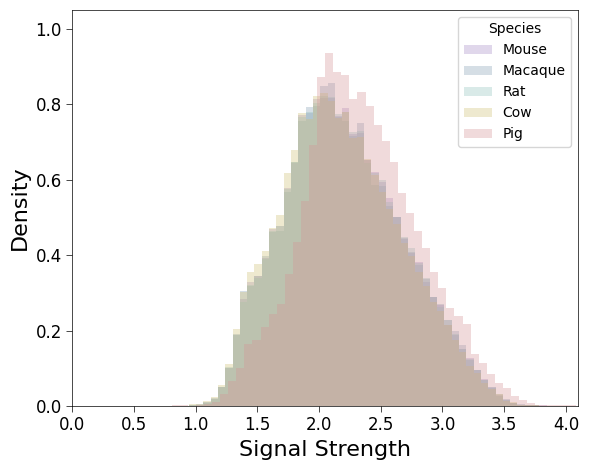

In [3]:
# histogram of eqn overlay all 5 species
import pandas as pd
import matplotlib.pyplot as plt
direc = 'distrib_hist/'
# Define file paths and labels
files = {
    'Mouse': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/mouse_liver_pos_ALL.bed',
    'Macaque': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/macaque_liver_pos_ALL.bed',
    'Rat': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/rat_liver_pos_ALL.bed',
    'Cow': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/cow_liver_pos_ALL.bed',
    'Pig': '/home/azstephe/liverRegression/regression_liver/data/ladder_qn/pig_liver_pos_ALL.bed'
}

# Plot all histograms on the same figure
plt.figure(figsize=(6, 4.8))

for species, path in files.items():
    df = pd.read_csv(path, header=None, sep='\t')
    plt.hist(df[4], bins=50, alpha=0.35, label=species, color=colors[species], density=True, edgecolor=None)

plt.xlabel('Signal Strength', fontsize=16)
plt.ylabel('Density', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Species")
plt.xlim(0,4.1)
plt.ylim(0, 1.05)
ax=plt.gca()
for spine in plt.gca().spines.values():
    spine.set_linewidth(0.5)
ax.tick_params(width=0.5, length=4)
plt.tight_layout()
# plt.savefig(f"{thesis_dir}{direc}ladder5_overlay_density.svg", dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# nonmouse negative histograms
from scipy.stats import mannwhitneyu

direc = 'neg_hist_6_13/'

def histogram(pred_df, original_df, name, title, p_val, species, neg_pred_value, mean_pos_value, pos_label='Real for Pos'):
    plt.figure(figsize=(6, 4.8))
    plt.hist(pred_df, bins=50, label='Pred for Neg', alpha=0.5, color=colors['Neg'], density=True)
    plt.hist(original_df, bins=50, label=pos_label, alpha=0.5, color=colors[species.capitalize()], density=True)
    plt.xlim(0,4.1)
    ax=plt.gca()
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    for spine in plt.gca().spines.values():
        spine.set_linewidth(0.5)
    ax.tick_params(width=0.5, length=4)
    plt.xlabel(f'{name}', fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.axvline(x=neg_pred_value, color=super_darks['Neg'], linestyle='-', linewidth=0.3)
    plt.axvline(x=mean_pos_value, color=super_darks[species.capitalize()], linestyle='-', linewidth=0.3)
    plt.legend()
    # plt.savefig(f"{thesis_dir}{direc}{species}_{title.replace(' ', '_')}.svg", dpi=300, bbox_inches='tight')
    # plt.show()
    plt.close()

def mannwhit(pred_df, original_df, name):
    x = pred_df.squeeze()
    y = original_df.squeeze()
        
    stat, p_value = mannwhitneyu(x, y, alternative='two-sided')
        
        # Interpretation
    alpha = 0.05

    return p_value

results = []
species_list = ['macaque', 'rat', 'cow', 'pig']
# species_list = ['macaque']
model_list = ['bdbi7l3n']
for species in species_list:
    for model in model_list:

        original_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', header=None, sep='\t').iloc[:,4]
        
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)

        p_val_test1 = mannwhit(pred_test1_df, original_df, 'test1') 


        results.append({
            'species': species,
            'model': model,
            'comparison': 'pred test1 vs real pos test',
            'avg_pred_neg_test1': pred_test1_df.mean()[0],
            'avg_real_pos': original_df.mean(),
            'p_value': p_val_test1
        })
        
        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_neg_df = pred_orthologs_df.tail(neg_len)
        pred_pos_df = pred_orthologs_df.head(pos_len)

        p_val_neg = mannwhit(pred_neg_df, original_df, 'full neg test set')
        results.append({
            'species': species,
            'model': model,
            'comparison': 'pred neg test vs real pos test',
            'avg_pred_neg': pred_neg_df.mean()[0],
            'avg_real_pos': original_df.mean(),
            'p_value': p_val_neg
        })
        
        p_val_neg_pred = mannwhit(pred_neg_df, pred_pos_df, 'neg test set vs pos test set')
        results.append({
            'species': species,
            'model': model,
            'comparison': 'pred neg test vs pred pos test',
            'avg_pred_neg': pred_neg_df.mean()[0],
            'avg_real_pos': pred_pos_df.mean()[0],
            'p_value': p_val_neg_pred
        })
        
        histogram(pred_test1_df, original_df, 'Signal Strength', 'Negative Test1 Vs. True Signal Strength', p_val_test1, species, pred_test1_df.mean()[0], original_df.mean())
        histogram(pred_neg_df, original_df, 'Signal Strength', 'Negative Test Set Vs. True Signal Strength', p_val_neg, species, pred_neg_df.mean()[0], original_df.mean())
        histogram(pred_neg_df, pred_pos_df, 'Signal Strength', 'Negative Test Set Vs. Positive Test Set Predictions', p_val_neg_pred, species, pred_neg_df.mean()[0], pred_pos_df.mean()[0], 'Pred for Pos')

species = 'mouse'
original_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/log/{species}_liver_pos_ALL.bed', header=None, sep='\t').iloc[:,4]

pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)
        
neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/mouse_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/mouse_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
neg_len = 2*len(neg_df)
pos_len = 2*len(pos_df)
        
doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
pred_neg_df = pred_df.tail(neg_len)
pred_pos_df = pred_df.head(pos_len)

p_val_neg = mannwhit(pred_neg_df, original_df, 'neg test set')
p_val_neg_pred = mannwhit(pred_neg_df, pred_pos_df, 'neg test set vs pos test set')  

p_val_neg = mannwhit(pred_neg_df, original_df, 'full neg test set')
results.append({
            'species': species,
            'model': model,
            'comparison': 'pred neg test vs real pos test',
            'avg_pred_neg': pred_neg_df.mean()[0],
            'avg_real_pos': original_df.mean(),
            'p_value': p_val_neg
        })
        
p_val_neg_pred = mannwhit(pred_neg_df, pred_pos_df, 'neg test set vs pos test set')
results.append({
            'species': species,
            'model': model,
            'comparison': 'pred neg test vs pred pos test',
            'avg_pred_neg': pred_neg_df.mean()[0],
            'avg_real_pos': pred_pos_df.mean()[0],
            'p_value': p_val_neg_pred
        })

histogram(pred_neg_df, original_df, 'Signal Strength', 'Negative Test Set Vs. True Signal Strength', p_val_neg, species, pred_neg_df.mean()[0], original_df.mean())
histogram(pred_neg_df, pred_pos_df, 'Signal Strength', 'Negative Test Set Vs. Positive Test Set Predictions', p_val_neg_pred, species, pred_neg_df.mean()[0], pred_pos_df.mean()[0], 'Pred for Pos')

results_df = pd.DataFrame(results)

### re-order to make table look nice
comparisons = {
    'pred test1 vs real pos test': 'test1_vs_real_pos',
    'pred neg test vs real pos test': 'neg_vs_real_pos',
    'pred neg test vs pred pos test': 'neg_vs_pred_pos'
}

rows = []

for species, group in results_df.groupby("species"):
    # Neg Mean Pred
    row = {'species': species, 'stat': 'neg mean pred'}
    for comp_orig, comp_clean in comparisons.items():
        if comp_clean == 'test1_vs_real_pos':
            val = group.loc[group['comparison'] == comp_orig, 'avg_pred_neg_test1']
        else:
            val = group.loc[group['comparison'] == comp_orig, 'avg_pred_neg']
        row[comp_clean] = val.values[0] if len(val) else np.nan
    rows.append(row)

    # Pos Mean Pred
    row = {'species': species, 'stat': 'pos mean pred'}
    for comp_orig, comp_clean in comparisons.items():
        val = group.loc[group['comparison'] == comp_orig, 'avg_real_pos']
        row[comp_clean] = val.values[0] if len(val) else np.nan
    rows.append(row)

    # P Value
    row = {'species': species, 'stat': 'p_val'}
    for comp_orig, comp_clean in comparisons.items():
        val = group.loc[group['comparison'] == comp_orig, 'p_value']
        row[comp_clean] = val.values[0] if len(val) else np.nan
    rows.append(row)

# FINAL TABLE
summary_df = pd.DataFrame(rows)
# summary_df.to_csv("/home/azstephe/liverRegression/regression_liver/data/figs/tables/negative_set_histogram_stats.csv", index=False)


cow

bdbi7l3n
Pearson correlation coefficient for test2: 0.4659, p-test: 3.154e-33
Spearman correlation coefficient for test2: 0.4561, p-test: 9.39e-32
Pearson correlation coefficient for test3: 0.3185, p-test: 4.222e-34
Spearman correlation coefficient for test3: 0.3212, p-test: 1.107e-34
Pearson correlation coefficient for mouse test orthologs: 0.3769, p-test: 7.746e-113
Spearman correlation coefficient for mouse test orthologs: 0.3852, p-test: 3.337e-118


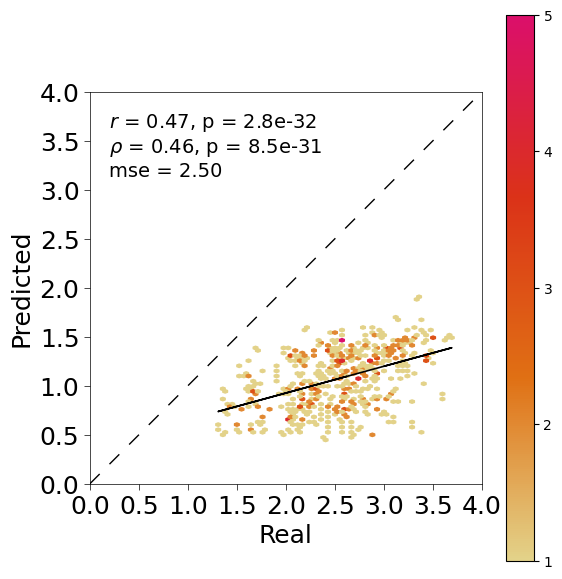

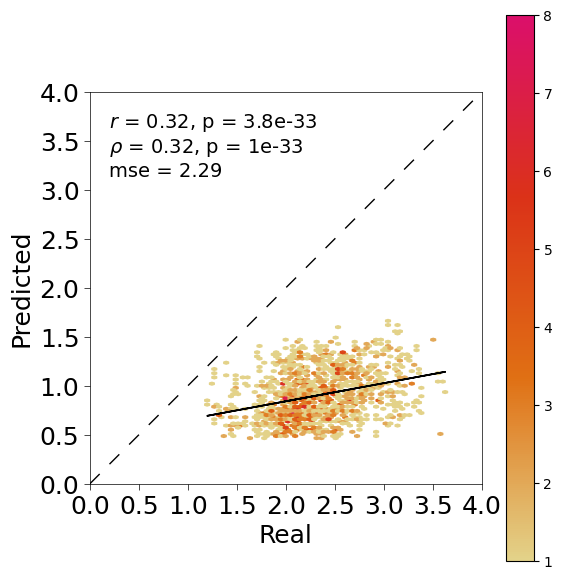

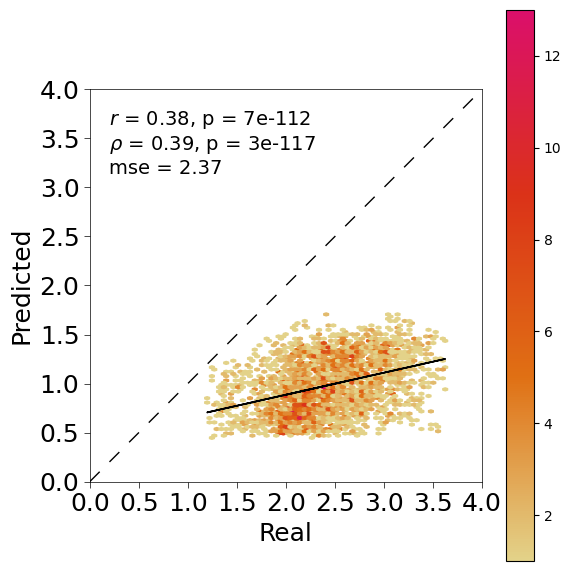

Pearson correlation coefficient for mouse test: 0.4958, p-test: 0
Spearman correlation coefficient for mouse test: 0.5022, p-test: 0


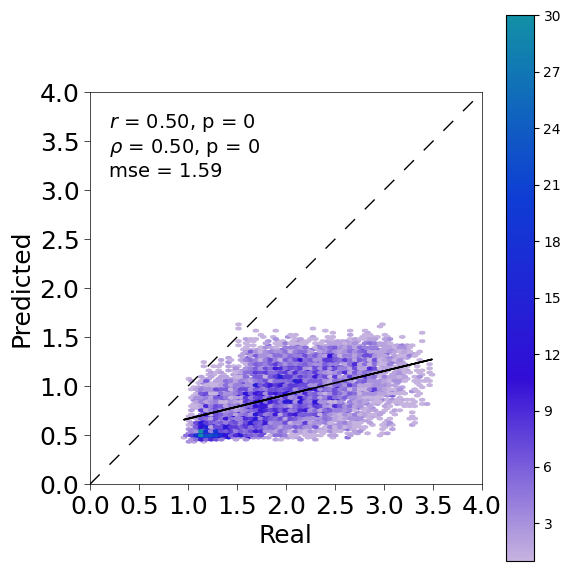

In [51]:
# test log scatter
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap, to_rgb

direc='test_scatter_6_13/'
def mean_squared_error(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    return np.mean((y_true - y_pred) ** 2)
def format_pval(p):
    return "0.0" if p == 0 else f"{p:.2e}"

def round_sigfig_p(p):
    if p == 0:
        return "0"
    return f"{p:.2g}"
    
def make_smooth_colormap(name, colors_hex, n_points=256):
    colors_rgb = [to_rgb(c) for c in colors_hex]
    return LinearSegmentedColormap.from_list(name, colors_rgb, N=n_points)
    
def make_triple_colormap(base_hex, name):
    if name == 'Cow_triple':
        return make_smooth_colormap('Cow_contrast', [lights['Cow'], '#e07014', '#db3218', '#db0f6b'])
    elif name == 'Mouse_triple':
        return make_smooth_colormap('Mouse_contrast', [lights['Mouse'], '#320dd6', '#0f3dd4', '#1290a6'])
    else:
        return make_smooth_colormap(name + '_contrast', ['#ffffcc', base_hex, '#3b528b'])

triple_cmaps = {name: make_triple_colormap(hex_color, name + '_triple')
                for name, hex_color in colors.items()}

def scatter(pred_df, true_df, title, xlabel, ylabel, r, rP, rho, rhoP, mse, species):
    x = true_df.squeeze()
    y = pred_df.squeeze()

    gridsize=50
    
    plt.figure(figsize=(6, 6))
    plt.xlim(0, 4)
    plt.ylim(0, 4)
    plt.plot([0, 4], [0, 4], color='black', linestyle='--', linewidth=1, dashes=(10, 10))

    custom_cmap = triple_cmaps[species.capitalize()]
        
    hb = plt.hexbin(x, y, gridsize=gridsize, cmap=custom_cmap, mincnt=1)  # higher gridsize = finer bins
    cb = plt.colorbar(hb)

    # Set colorbar ticks to integers only
    cb.locator = ticker.MaxNLocator(integer=True)
    cb.update_ticks()

    plt.xlabel(f'{xlabel}', fontsize=18)
    plt.ylabel(f'{ylabel}', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    textstr = f'$r$ = {r:.2f}, p = {rP*9:.2g}\n$\\rho$ = {rho:.2f}, p = {rhoP*9:.2g}\nmse = {mse:.2f}'
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=14, verticalalignment='top')

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.tick_params(width=0.5, length=4)
    for spine in ax.spines.values():
        spine.set_linewidth(0.5)

    x = true_df.squeeze().values.reshape(-1, 1)
    y = pred_df.squeeze().values

    # Fit linear regression
    reg = LinearRegression().fit(x, y)
    slope = reg.coef_[0]
    intercept = reg.intercept_
    reg_line = reg.predict(x)
    plt.plot(x, reg_line, color='black', linewidth=1.2, label=f'Linear Fit (slope = {slope:.2f})')
    plt.tight_layout()

    # plt.savefig(f"{thesis_dir}{direc}{title.replace(' ', '_')}_density_{str(gridsize)}.png", dpi=300, bbox_inches='tight')
    plt.show()
    # plt.close()
    return slope

results_corr = []
# species_list = ['macaque', 'rat', 'cow', 'pig']
species_list = ['cow']

# model_list = ['kf8188qf', 'cq45eb2s']
model_list = ['bdbi7l3n']
for species in species_list:
    print(f'\n{species}')
    for model in model_list:
        print(f'\n{model}')
        
        # load all the DFs
        pred_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/new_{model}/activations_{species}_TEST.csv', header=None)
        
        test1_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/amy_test1/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test2_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test2/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        test3_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_test3/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        test1_len = 2*len(test1_df)
        test2_len = 2*len(test2_df)
        test3_len = 2*len(test3_df)
        
        # input sanity check
        if len(pred_df) != test1_len+test2_len+test3_len:
            print("ERROR: predictions are a different length than testidation sets")
        
        doubled_test1_df = pd.concat([test1_df, test1_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test2_df = pd.concat([test2_df, test2_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_test3_df = pd.concat([test3_df, test3_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_test1_df = pred_df.head(test1_len)
        pred_test2_df = pred_df.iloc[test1_len:test1_len + test2_len]
        pred_test3_df = pred_df.tail(test3_len)

        #############
        pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST_orthologs.csv', header=None)

        pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
        neg_len = 2*len(neg_df)
        pos_len = 2*len(pos_df)
        
        # input sanity check
        if len(pred_orthologs_df) != neg_len+pos_len:
            print("ERROR: predictions are a different length than testidation sets")

        doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
        doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
        pred_pos_df = pred_orthologs_df.head(pos_len)
        pred_neg_df = pred_orthologs_df.tail(neg_len)

        
        test2R, test2RP, test2Rho, test2RhoP = correlations(pred_test2_df, doubled_test2_df, 'test2')
        
        test3R, test3RP, test3Rho, test3RhoP = correlations(pred_test3_df, doubled_test3_df, 'test3')
        
        orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test orthologs')
        test2Mse = mean_squared_error(doubled_test2_df, pred_test2_df)
        test3Mse = mean_squared_error(doubled_test3_df, pred_test3_df)
        orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)

        slope2 = scatter(pred_test2_df, doubled_test2_df, f'{species.capitalize()} Prediction Accuracy for Test2 ({model})', 'Real', 'Predicted', test2R, test2RP, test2Rho, test2RhoP, test2Mse, species)
        slope3 = scatter(pred_test3_df, doubled_test3_df, f'{species.capitalize()} Prediction Accuracy for Test3 ({model})', 'Real', 'Predicted', test3R, test3RP, test3Rho, test3RhoP, test3Mse, species)
        slopeOrtho = scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'Real', 'Predicted', orthoR, orthoRP, orthoRho, orthoRhoP, orthoMse, species)

        
        results_corr.append({
            'species': species,
            'model': model,
            'set': 'test2',
            'pearson_r': test2R,
            'pearson_p': round_sigfig_p(test2RP * 9),
            'spearman_rho': test2Rho,
            'spearman_p': round_sigfig_p(test2RhoP * 9),
            'mse': test2Mse,
            'slope': slope2
        })
        results_corr.append({
            'species': species,
            'model': model,
            'set': 'test3',
            'pearson_r': test3R,
            'pearson_p': round_sigfig_p(test3RP * 9),
            'spearman_rho': test3Rho,
            'spearman_p': round_sigfig_p(test3RhoP * 9),
            'mse': test3Mse,
            'slope': slope3
        })
        results_corr.append({
            'species': species,
            'model': model,
            'set': 'orthologs',
            'pearson_r': orthoR,
            'pearson_p': round_sigfig_p(orthoRP * 9),
            'spearman_rho': orthoRho,
            'spearman_p': round_sigfig_p(orthoRhoP * 9),
            'mse': orthoMse,
            'slope': slopeOrtho
        })

        
species = 'mouse'
for model in model_list:
    pred_orthologs_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/model_outputs/{model}/activations_{species}_TEST.csv', header=None)

    pos_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/log_pos/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
    neg_df = pd.read_csv(f'/home/azstephe/liverRegression/regression_liver/data/test_splits/neg/{species}_liver_TEST_500bp.bed', header=None, delim_whitespace=True).iloc[:,4]
        
    neg_len = 2*len(neg_df)
    pos_len = 2*len(pos_df)
        
        # input sanity check
    if len(pred_orthologs_df) != neg_len+pos_len:
        print("ERROR: precdictions are a different length than testidation sets")

    doubled_neg_df = pd.concat([neg_df, neg_df]).sort_index(kind='mergesort').reset_index(drop=True)
    doubled_pos_df = pd.concat([pos_df, pos_df]).sort_index(kind='mergesort').reset_index(drop=True)
        
    pred_pos_df = pred_orthologs_df.head(pos_len)
    pred_neg_df = pred_orthologs_df.tail(neg_len)

    orthoR, orthoRP, orthoRho, orthoRhoP = correlations(pred_pos_df, doubled_pos_df, 'mouse test')
    orthoMse = mean_squared_error(pred_pos_df, doubled_pos_df)

    slopeOrtho = scatter(pred_pos_df, doubled_pos_df, f'{species.capitalize()} Prediction Accuracy for orthologs ({model})', 'Real', 'Predicted', orthoR, orthoRP, orthoRho,orthoRhoP, orthoMse, species)
    
    results_corr.append({
            'species': species,
            'model': model,
            'set': 'orthologs',
            'pearson_r': orthoR,
            'pearson_p': orthoRP,
            'spearman_rho': orthoRho,
            'spearman_p': orthoRhoP,
            'mse': orthoMse,
            'slope': slopeOrtho
        })


results_corr_df = pd.DataFrame(results_corr)
# results_corr_df.to_csv("/home/azstephe/liverRegression/regression_liver/data/figs/tables/correlation_stats_by_model.csv", index=False)




In [50]:
results_corr_df

,species,model,set,pearson_r,pearson_p,spearman_rho,spearman_p,mse,slope
0,cow,bdbi7l3n,test2,0.465874,2.8e-32,0.456109,8.5e-31,2.500185,0.272940
1,cow,bdbi7l3n,test3,0.318532,3.8e-33,0.321225,1e-33,2.290292,0.184989
2,cow,bdbi7l3n,orthologs,0.376930,7e-112,0.385247,3e-117,2.370557,0.224817
3,mouse,bdbi7l3n,orthologs,0.495768,0.0,0.502230,0.0,1.586095,0.243124
